In [59]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [6]:
df=pd.read_csv("sonar.all-data",sep=",",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [13]:
df.isnull().sum().head(60)
#we can say that there are no null values in the dataset

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
dtype: int64

60
0    111
1     97
dtype: int64

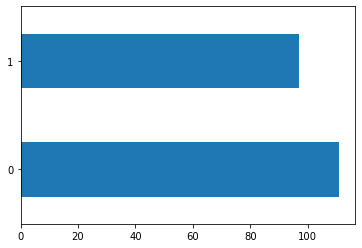

In [29]:
df[60].value_counts().plot(kind='barh')
df.groupby(60).size()
#"0"-Mine,"1"=Rock

As we can see there are two catagorical variables "M" (Mine) and "R"(Rock)

AttributeError: 'DataFrame' object has no attribute 'show'

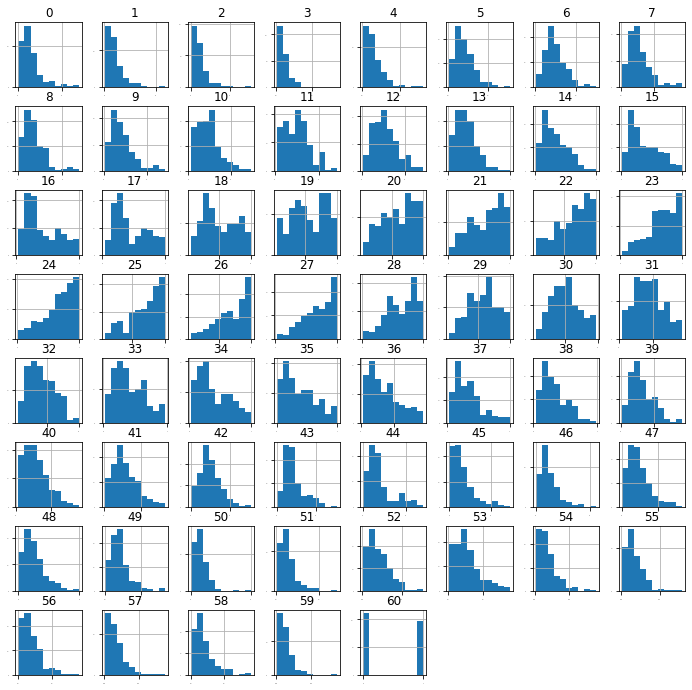

In [31]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
df.show()

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[60]=le.fit_transform(df[60])
df
#we have tranformed the "R" and "M" target variables to "1" and "0" Respectively 

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


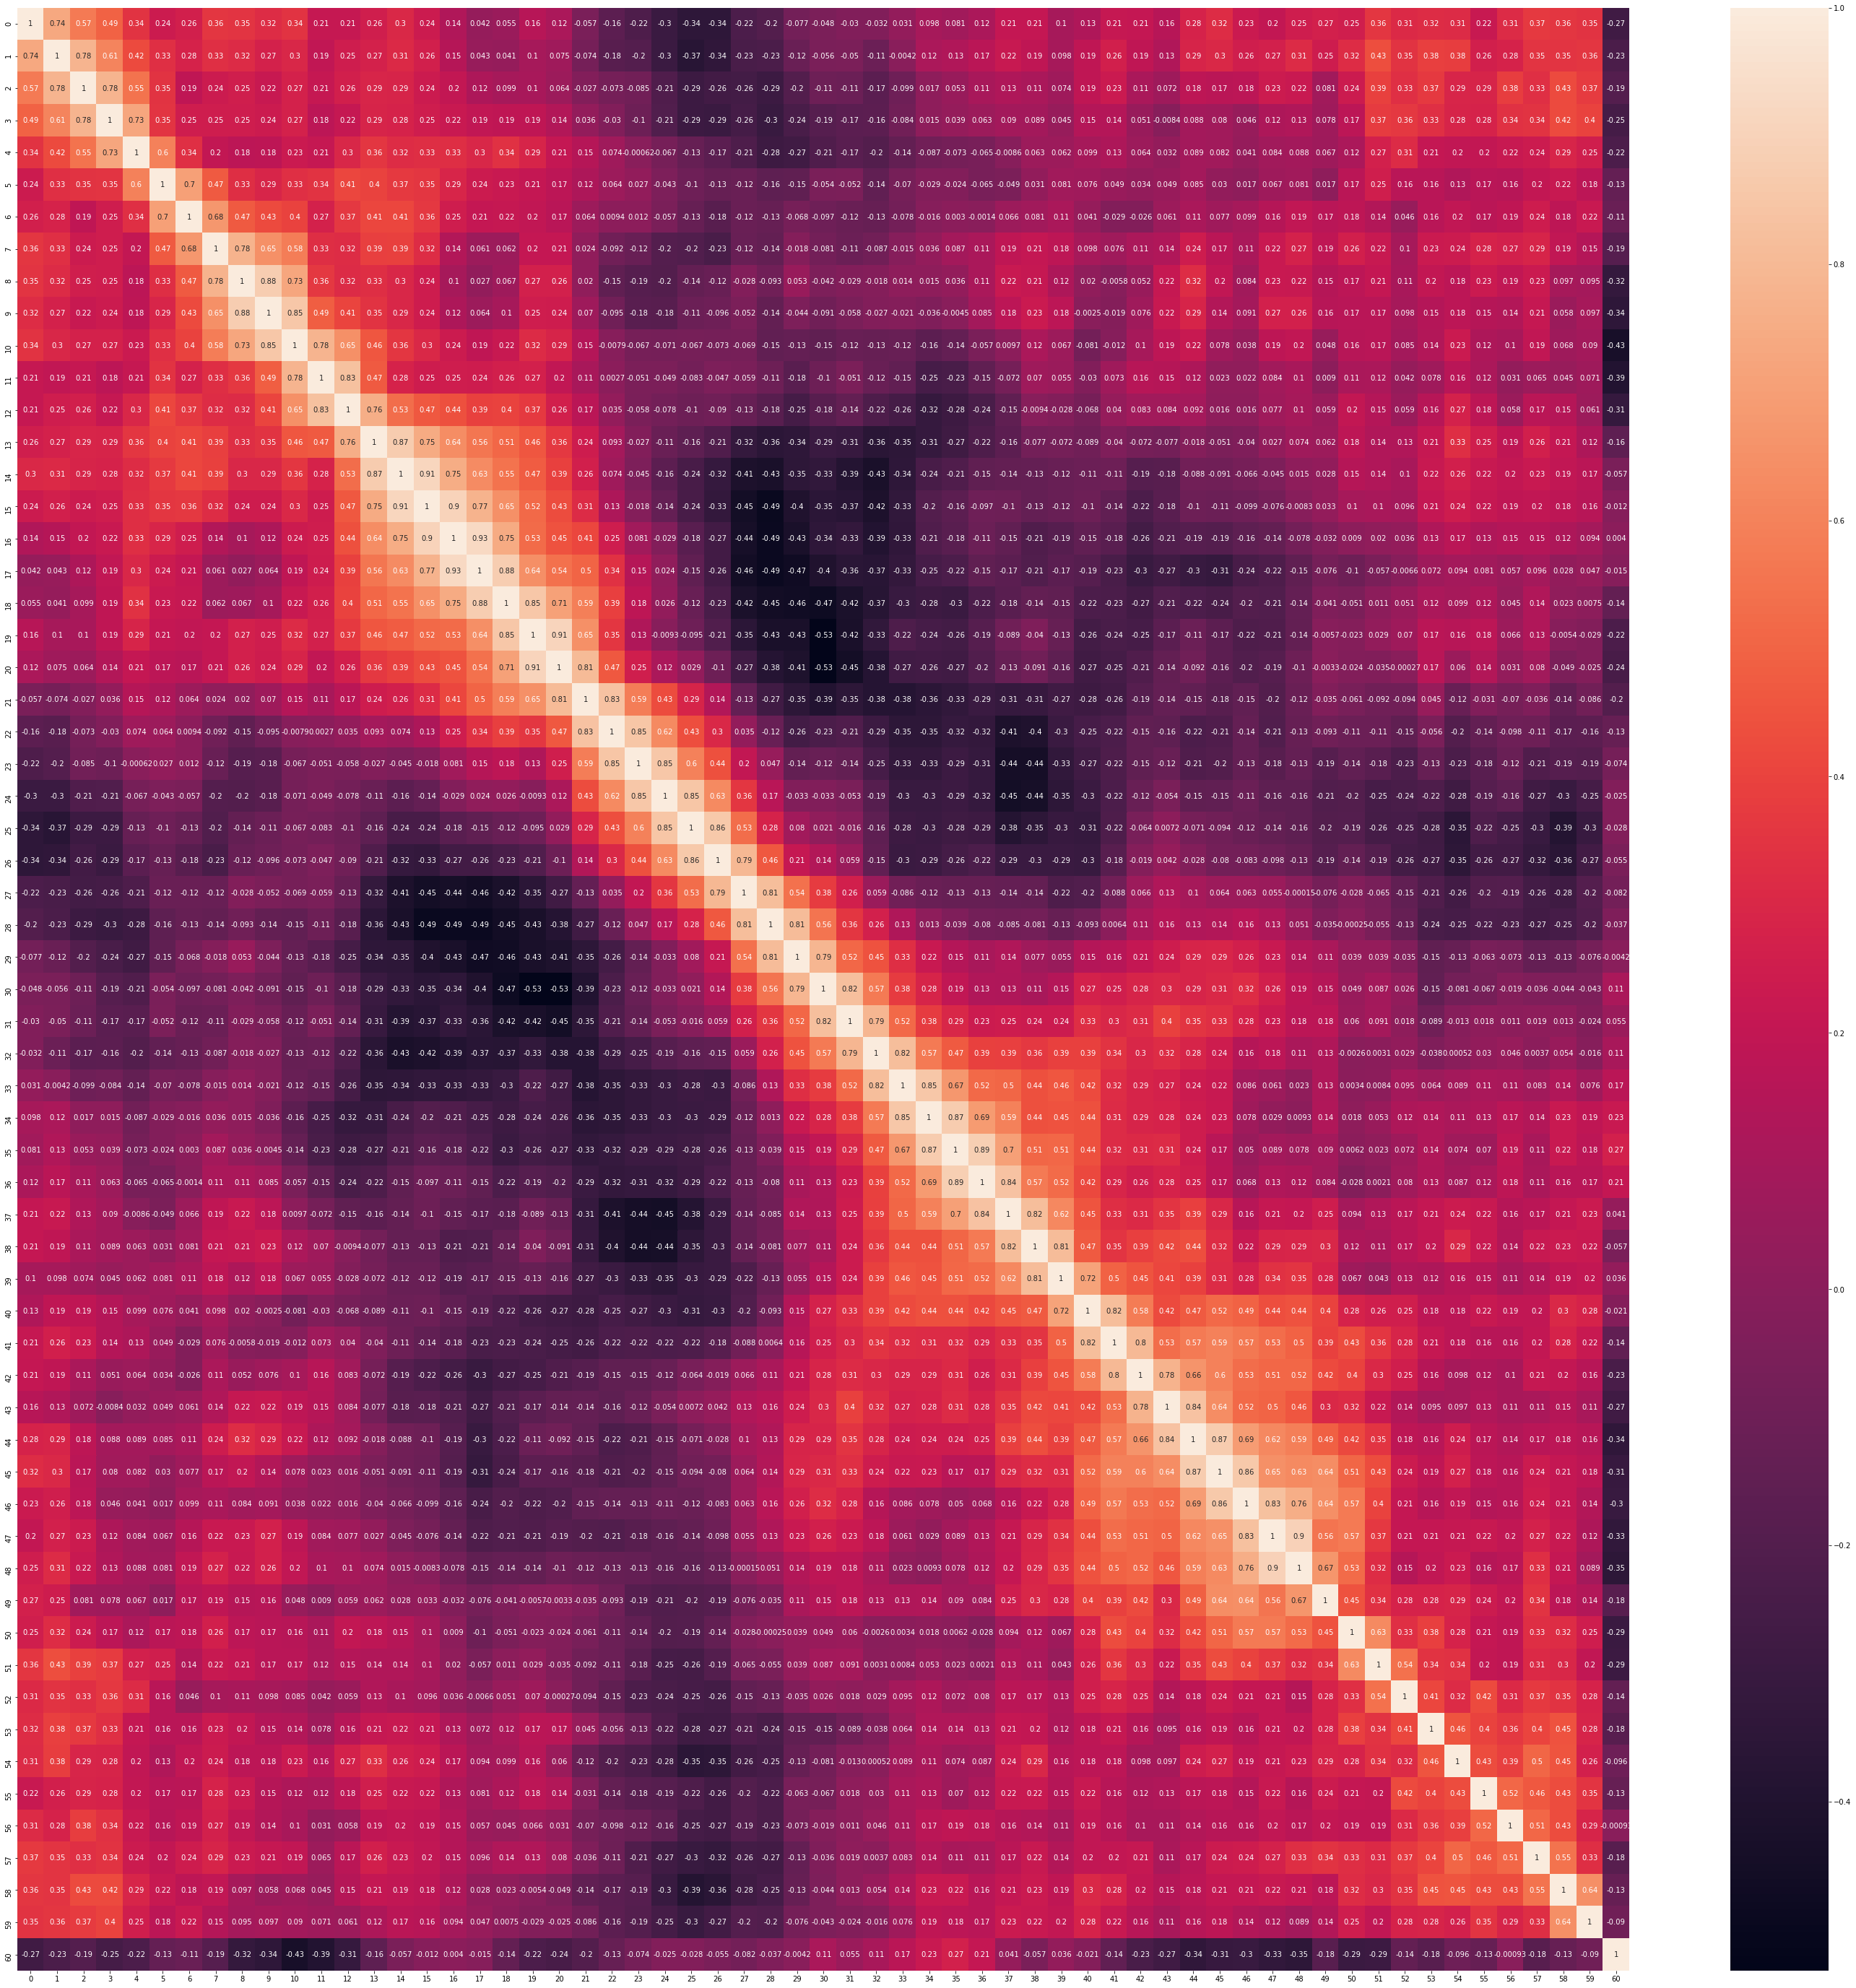

In [28]:
corr_hmap= df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_hmap,annot=True)
plt.show()
#As we can't conclude on the correlation of the variables to the target we are moving ahead

In [32]:
df.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
        ...   
56    1.653090
57    2.098330
58    1.737506
59    2.775754
60    0.135903
Length: 61, dtype: float64

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
print("\n Original Shape", df.shape, "New Shape",df_new.shape)
Percntage_loss=((208-168)/208)*100
print("\nPercentage loss:",Percntage_loss)

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
        22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
        85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
       101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
       135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
       140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
       147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64), array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
       46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
        1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
       53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
        8, 51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 4

As we can see there is loss of 19.23% data from the dataset we are not going to remove outliers 

In [51]:
x =df.iloc[:,0:-1]
y =df.iloc[:,-1]

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=7)  

In [77]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(5)),
    ]

In [78]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC: 0.776471 (0.090411)
Logistic Regression: 0.769485 (0.100510)
Decision Tree: 0.752574 (0.095787)
Naive Bayes: 0.648897 (0.141868)
KNearest Neighbors: 0.808088 (0.067507)


"KNN" and "SVC" have shown best results so we can do the standard scaling and measure the results again 

In [79]:
#Scaling KNN

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
param_grid = dict(n_neighbors=[1,3,5,7])
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaledx, y_train)

In [81]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.850000*100 using {'n_neighbors': 1}
#1 0.850000 (0.059686) with: {'n_neighbors': 1}
#3 0.837132 (0.066014) with: {'n_neighbors': 3}
#2 0.837500 (0.037377) with: {'n_neighbors': 5}
#4 0.763971 (0.089374) with: {'n_neighbors': 7}


We have transformed the data into much scaled version where the results have been increased in the case of KNN 
we can do the same with the second best perfoming mobel and decide on which is the best mobel to be used 

In [82]:
#Scaling with SVC
scaledx = scaler.transform(x_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid = dict(C=c_values, kernel=['linear', 'poly', 'rbf'])
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaledx, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
#18 0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
#30 0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
#29 0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
#23 0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
#28 0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
#16 0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
#26 0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
#27 0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
#12 0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
#22 0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
#23 0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
#11 0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
#17 0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'}
#14 0.769853 (0.111321) with: {'C': 0.9, 'kernel': 'poly'}
#5 0.836397 (0.088697) with: {'C': 0.9, 'kernel': 'rbf'}
#21 0.752574 (0.098883) with: {'C': 1.0, 'kernel': 'linear'}
#

we can observe that the mobel has best perfomed with 0.872426 accuracy using {'C': 2.0, 'kernel': 'rbf'}
so we can goahead with SVC model at using {'C': 2.0, 'kernel': 'rbf'}
right now SVC Scores-87.2% where as KNN scores - 85%

In [85]:
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
model = SVC(C=2.0,kernel='rbf') # rbf is default kernel
model.fit(scaledx, y_train)

SVC(C=2.0)

In [90]:
import numpy as np
scaledtestx = scaler.transform(x_test)
predictions = model.predict(scaledtestx)
#print(accuracy_score(y_test, predictions)) i have an issues printing the accuracy score 
#with following "TypeError: 'numpy.float64' object is not callable" 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[25  2]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.88      0.93      0.90        15

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42



In [97]:
predictions

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [98]:
y_test

11     1
128    0
158    0
98     0
131    0
22     1
155    0
2      1
24     1
46     1
97     0
191    0
162    0
199    0
66     1
65     1
139    0
57     1
104    0
160    0
113    0
186    0
115    0
148    0
99     0
80     1
60     1
141    0
205    0
101    0
95     1
122    0
78     1
168    0
74     1
143    0
200    0
9      1
166    0
206    0
177    0
85     1
Name: 60, dtype: int64

In [101]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":predictions})
df_pred

,Original,Predicted
11,1,1
128,0,0
158,0,0
98,0,0
131,0,0
22,1,1
155,0,0
2,1,1
24,1,1
46,1,0


In [131]:
X = array[:,0:-1].astype(float)
Y = array[:,-1].astype(float)
X=X.reshape(1,-1)
Y=Y.reshape(1,-1)

accuracy_score(X,Y)

TypeError: 'numpy.float64' object is not callable